In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\greengram_u_97-19_u.csv")
df = df.drop(columns=['latitude','longitude'])
df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df.columns

Index(['year', 'stl1_1', 'stl1_2', 'stl2_1', 'stl2_2', 'stl3_1', 'stl3_2',
       'stl4_1', 'stl4_2', 'swvl1_1', 'swvl1_2', 'swvl2_1', 'swvl2_2',
       'swvl3_1', 'swvl3_2', 'swvl4_1', 'swvl4_2', 'ssr_1', 'ssr_2',
       'DistrictName', 'Yield(Tonnes/Hectare)', 'rain_1', 'rain_2', 'tmax_1',
       'tmax_2', 'tmin_1', 'tmin_2', 'countrain_1', 'countrain_2', 'u10_3',
       'u10_4', 'v10_3', 'v10_4', 'rh_3', 'rh_4'],
      dtype='object')

In [4]:
df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
df['rain'] = (df['rain_1'] + df['rain_2'])/2
df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
df['countrain'] = df['countrain_1'] + df['countrain_2']
df['u10'] = (df['u10_3']+df['u10_4'])/2
df['v10'] = (df['v10_3']+df['v10_4'])/2
df['rh'] = (df['rh_3']+df['rh_4'])/2

In [5]:
df = df.drop(columns=['stl1_1','stl1_2','stl2_1','stl2_2','stl3_1','stl3_2','stl4_1','stl4_2','swvl1_1','swvl1_2','swvl2_1','swvl2_2','swvl3_1','swvl3_2','swvl4_1','swvl4_2','ssr_1','ssr_2','rain_1','rain_2','tmax_1','tmax_2','tmin_1','tmin_2','countrain_1','countrain_2','u10_3','u10_4','v10_3','v10_4','rh_3','rh_4'],axis=1)

In [6]:
df.shape

(1725, 19)

In [7]:
df.columns

Index(['year', 'DistrictName', 'Yield(Tonnes/Hectare)', 'stl1', 'stl2', 'stl3',
       'stl4', 'swvl1', 'swvl2', 'swvl3', 'swvl4', 'ssr', 'rain', 'tmax',
       'tmin', 'countrain', 'u10', 'v10', 'rh'],
      dtype='object')

In [8]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [9]:
df.shape

(1146, 19)

In [10]:
df['Yield(Tonnes/Hectare)'].skew()

0.3199291246223679

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_9936\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

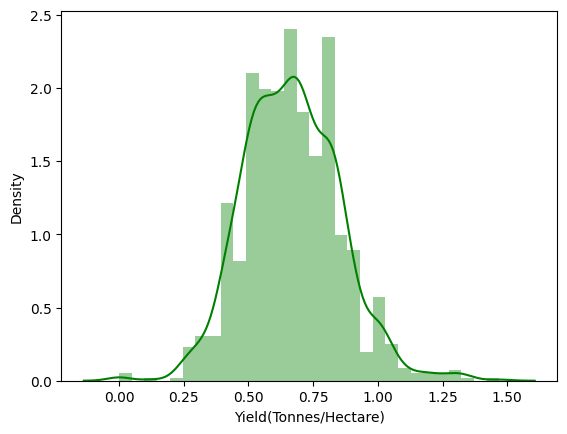

In [11]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [12]:
df['Yield(Tonnes/Hectare)']

0       0.32
1       1.00
2       0.77
3       0.72
5       0.25
        ... 
1716    0.81
1717    0.56
1718    0.43
1719    0.54
1723    0.59
Name: Yield(Tonnes/Hectare), Length: 1146, dtype: float64

In [13]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 1130


In [14]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [15]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [16]:
df['Yield(Tonnes/Hectare)'].skew()

0.13829048647906614

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_9936\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

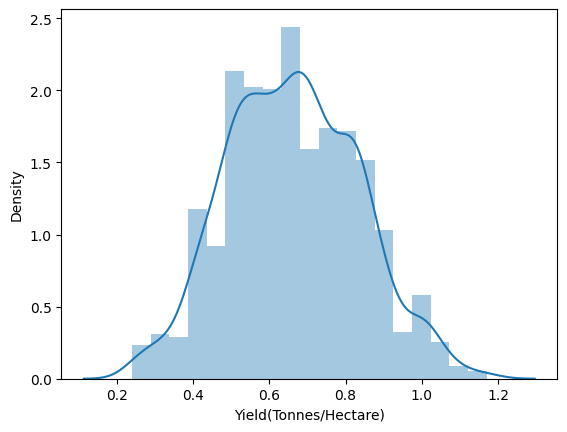

In [17]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [18]:
df.head(10)

,year,DistrictName,stl1,stl2,stl3,stl4,swvl1,swvl2,swvl3,swvl4,ssr,rain,tmax,tmin,countrain,u10,v10,rh,Yield(Tonnes/Hectare)
0,2012,kheri,28.398829,27.451112,24.952011,22.013855,0.151019,0.153621,0.181914,0.325734,1.933426e+07,0.144828,33.141621,17.012993,1,1.299402,-0.569527,37.186320,0.32
1,2014,jyotibaphulenagar,25.240084,24.342555,22.151339,19.968749,0.197745,0.209722,0.220513,0.337776,1.860938e+07,1.135048,30.843353,15.579375,5,1.793053,-1.578814,46.772956,1.00
2,1998,saharanpur,22.267068,21.626100,19.939407,18.041836,0.287275,0.291799,0.275246,0.342021,1.809287e+07,2.875930,27.862660,14.644028,7,0.571006,-0.810601,56.351748,0.77
3,2018,meerut,27.801309,26.914850,24.504408,21.578541,0.163835,0.155302,0.179679,0.290538,1.925049e+07,0.337757,33.367736,17.109980,4,0.749114,-0.696064,41.471285,0.72
5,1997,mathura,27.094495,26.189944,23.790681,21.146273,0.160933,0.158444,0.178104,0.323346,1.800688e+07,0.232303,32.728883,17.499704,2,0.797930,-0.732096,42.257121,0.25
6,2016,mahamayanagar,30.442643,29.527653,26.999594,23.969578,0.155514,0.153349,0.156513,0.233155,1.865574e+07,0.353798,36.785220,19.973871,1,1.124364,-1.232524,37.183489,0.50
7,2002,santkabirnagar,29.648231,28.649014,25.998089,22.767265,0.155681,0.154894,0.183590,0.330162,1.894452e+07,0.100547,35.280675,19.120142,1,-0.324569,-0.290706,40.757084,0.50
8,1999,raebareli,30.930747,29.791518,26.846638,23.303329,0.137738,0.151236,0.177020,0.323860,2.025730e+07,0.000000,37.524159,19.016457,0,2.387652,-1.016668,28.454349,0.74
9,2017,aligarh,28.886303,27.906808,25.281640,22.507230,0.156088,0.155765,0.167646,0.272770,1.922036e+07,0.512051,35.730240,18.481871,3,1.053260,-0.935332,38.311820,0.54
10,2018,unnao,30.092056,29.151079,26.603952,23.455053,0.148653,0.151563,0.176800,0.318705,1.903398e+07,0.042629,36.159071,19.086010,0,0.630158,-0.680787,36.600890,1.10


In [19]:
df.shape

(1130, 19)

In [20]:
cat_cols = ['DistrictName', 'year']
# Label encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [21]:
df.head()

,year,DistrictName,stl1,stl2,stl3,stl4,swvl1,swvl2,swvl3,swvl4,ssr,rain,tmax,tmin,countrain,u10,v10,rh,Yield(Tonnes/Hectare)
0,10,44,28.398829,27.451112,24.952011,22.013855,0.151019,0.153621,0.181914,0.325734,1.933426e+07,0.144828,33.141621,17.012993,1,1.299402,-0.569527,37.186320,0.32
1,12,38,25.240084,24.342555,22.151339,19.968749,0.197745,0.209722,0.220513,0.337776,1.860938e+07,1.135048,30.843353,15.579375,5,1.793053,-1.578814,46.772956,1.00
2,1,62,22.267068,21.626100,19.939407,18.041836,0.287275,0.291799,0.275246,0.342021,1.809287e+07,2.875930,27.862660,14.644028,7,0.571006,-0.810601,56.351748,0.77
3,16,54,27.801309,26.914850,24.504408,21.578541,0.163835,0.155302,0.179679,0.290538,1.925049e+07,0.337757,33.367736,17.109980,4,0.749114,-0.696064,41.471285,0.72
5,0,52,27.094495,26.189944,23.790681,21.146273,0.160933,0.158444,0.178104,0.323346,1.800688e+07,0.232303,32.728883,17.499704,2,0.797930,-0.732096,42.257121,0.25


In [22]:
df.shape

(1130, 19)

In [23]:
df.columns

Index(['year', 'DistrictName', 'stl1', 'stl2', 'stl3', 'stl4', 'swvl1',
       'swvl2', 'swvl3', 'swvl4', 'ssr', 'rain', 'tmax', 'tmin', 'countrain',
       'u10', 'v10', 'rh', 'Yield(Tonnes/Hectare)'],
      dtype='object')

In [ ]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [ ]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [24]:
df.shape

(1130, 19)

In [25]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# X = X.drop(columns=['stl2','stl3'],axis=1)

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.21, R^2 Score (Test): 0.19
[0.14341609537721223, 0.1792960142986787, 0.12533756882621838, 0.17534029879184176, 0.20334213776444754, 0.28147422933380917, 0.20299156204012614, 0.11703485406054381, 0.33499632869123397, 0.1491879513066351]
Ridge Regression - R^2 Score (Train) : 0.21, R^2 Score (Test): 0.18
[0.2566021405593284, 0.25537428560304154, 0.2324571350539537, 0.23545539418729233, -0.014558601154224471, 0.16618519176032176, 0.16837933083709, 0.18129822473294666, 0.19050471943318126, 0.11000665020411515]
XGB Regressor - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.38
[0.4245211488565701, 0.34965439500490925, 0.38618439804139715, 0.41235882333603235, 0.3804667132021732, 0.4637530800373134, 0.4163379908155379, 0.34017387815425826, 0.2380831829224468, 0.3789195836856767]
Lasso Regression - R^2 Score (Train) : 0.04, R^2 Score (Test): 0.02
[-0.0190458780716376, 0.09765038183894115, 0.03273093965640761, 0.07264023967834632, 0.024530683959823274, -

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [29]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [30]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

16


In [31]:
print(columns_to_drop)

['stl2', 'stl3', 'stl4', 'stl1', 'stl3', 'stl4', 'stl1', 'stl2', 'stl4', 'stl1', 'stl2', 'stl3', 'swvl2', 'rh', 'swvl1', 'swvl1']


In [32]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl1 : [('stl2', 0.9987), ('stl3', 0.9821), ('stl4', 0.91)]
stl2 : [('stl1', 0.9987), ('stl3', 0.9901), ('stl4', 0.9269)]
stl3 : [('stl1', 0.9821), ('stl2', 0.9901), ('stl4', 0.9667)]
stl4 : [('stl1', 0.91), ('stl2', 0.9269), ('stl3', 0.9667)]
swvl1 : [('swvl2', 0.9534), ('rh', 0.9109)]
swvl2 : [('swvl1', 0.9534)]
rh : [('swvl1', 0.9109)]


In [33]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [34]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

Root mean squared test error = 0.12588778615887394


In [35]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

0.01584773470398237 0.353215347492125


In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")